##  4.2评估机器学习模型
#### 模型的过拟合：随着训练的进行，模型在训练集上的性能不断提高，但在前所未见的数据集上（测试集）的性能则不在开始变化或者开始下降
#### 机器学习的目的是可以得到泛化的模型，即在前所未见的数据上表现很好的模型

### 4.2.1 训练集、验证集和测试集
#### 超参数(hyperparameter):是模型外部的配置，其值不能从数据估计得到（如模型的层数、每一层网络的大小）  
#### 学习：在某个参数空间中寻找良好的模型配置  
因此，如果基于模型在验证集上的的性能来调节模型配置，会很快导致模型在验证集上的过拟合  
#### 信息泄露(information leak)：每次在基于验证集上的性能来调节模型的超参数，都会有一些关于验证数据的信息泄漏到模型中，如果对每个参数只调节一次，那么新楼的信息会很少，验证集仍然可以可靠地评估模型。但如果多次重复这一过程，那么会有越来越多的关于验证集的信息泄漏到模型中
所以需要一个完全不同的、前所未见的数据集来评估模型，他就是测试集

#### 1、简单的留出验证
留出一定比例的数据作为测试集。在剩余的数据上训练模型，然后在测试集上评估模型。  
为了防止信息泄露，不能基于测试集来调节模型，应该还保留一个验证集  
留出验证(hold-out validation):
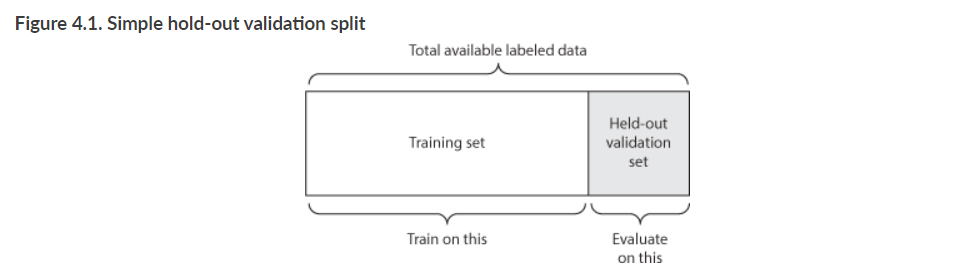

留出验证的代码实现

In [ ]:
num_validation_smaple = 10000

np.random.shuffle(data) #打乱数据

validation_data = data[ : num_validation_smaple]
data = data[num_validation_smaple : ]

training_data = data[ : ]

network = build_model() #建立模型
network.train(training_data) #在训练数据上训练模型
validation_score = model.evaluate(validation_data) # 并在验证数据上评估模型

# 现在可以调节模型、重新训练、评估、再次调节...

network = build_network()
network.train(np.concatenate([training_data, validation_data]))
test_score = netwrk.evaluate(test_data)

#### 2、K折验证  
K折验证(K-fold validation)将数据划分成大小相同的K个分区。对于每个分区i，在剩下的K-1个分区上训练模型，然后在分区i上评估模型，最终分数等于K个分数的平均值。  
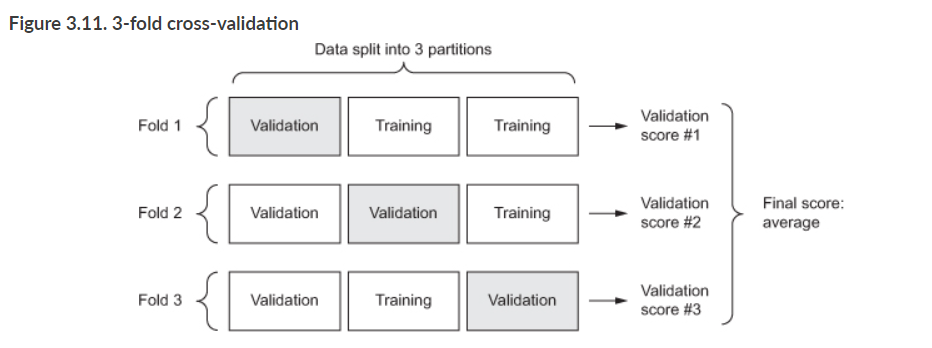

K折验证的代码实现

In [ ]:
k = 4
n = len(data) // k # //表示取整符号

np.random.shuffle(data)
validaiotn_scores = []

for i in range(k):
    print(f"fold {i}")
    validaiotn_data = data[i * n : (i + 1) * n] #选择验证数据分区
    training_data = np.concatenate([data[ : i * n], data[(i + 1) * n]]) #剩下的数据作为训练数据
    
    network = build_model() #创建一个新的神经网咯
    network.train(training_data) #训练刚刚创建的网络
    validation_score = network.evaluate(validation_data) #验证集在神经网络上进行验证
    validation_scores.append(validation_score)
    
validation_score = np.average(validation_scores) #最终分数：K折验证分数的平均值

network = build_model()
network.train(data)
test_score = network.evaluate(test_data)

#### 3、带有打乱数据的重复K折验证
如果可用的数据相对较少，但又要尽可能精确地评估模型，那么可以选择带有打乱数据的重复K折验证(interated K-fold validation with shuffle)  
#### 这种方法在Kaggle竞赛中特别有用 
具体做法：  
多次使用K折验证，在每次将数据划分为K个分区之前都先将数据打乱，最终分数是每次K折验证分数的平均值  
这种方法一共要训练和评估P * K个模型(P是重复的次数)

### 4.2.2 评估模型的注意事项
选择和评估模型时需要注意以下几点:  
#### (1)数据代表性(data representativeness)
在数据划分成训练集和测试集之前应该随机打乱数据
#### (2)时间箭头(the arrow of time)
想要根据过去的情况来预测未来的情况，这时候不能打乱数据，并且要确保测试集数据的时间都要晚于训练集的时间
#### (3)数据冗余(redundancy of data)  
要确保训练集和测试集之间没有交集